In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stat

pd.set_option('display.max_columns', 500)
%matplotlib inline

In [214]:
pts = pd.read_csv('eicu-collaborative-research-database-2.0/patient.csv.gz')
dxs = pd.read_csv('eicu-collaborative-research-database-2.0/diagnosis.csv.gz')
tm = pd.read_csv('eicu-collaborative-research-database-2.0/treatment.csv.gz')
hos = pd.read_csv('eicu-collaborative-research-database-2.0/hospital.csv.gz')
cpg = pd.read_csv('eicu-collaborative-research-database-2.0/carePlanGeneral.csv.gz')
lab = pd.read_csv('eicu-collaborative-research-database-2.0/lab.csv.gz')
#apache = pd.read_csv('eicu-collaborative-research-database-2.0/apachePatientResult.csv.gz')

In [215]:
pts = pts[pts.gender != 'Unknown']
pts = pts[pts.gender != 'Other']
pts = pts[pts.unitadmitsource == 'Emergency Department']
pts = pd.merge(pts, hos, on=['hospitalid'], how = 'left')

In [265]:
def age (x):
    if x == '> 89':
        return 90
    else:
        return int(x)
    
def pain_val (x, arr):
    try:
        return round(arr['nursingchartvalue'][x])
    except:
        return np.nan

In [217]:
pts['hospitaladmitsource'].fillna(value = 'Unknown', inplace = True)

pts['age'].fillna(value = 0, inplace = True)
pts['age'] = pts['age'].apply(lambda x: age(x))

In [218]:
pts['sepsis'] = pts['apacheadmissiondx'].str.contains('sepsis', case = False).fillna(False)
pts['mi'] = pts['apacheadmissiondx'].str.contains('MI', case = False).fillna(False)
pts['trauma'] = pts['apacheadmissiondx'].str.contains('trauma', case = False).fillna(False)

In [219]:
pts.sepsis= pts.sepsis.apply(lambda x: int(x == True))
pts.mi= pts.mi.apply(lambda x: int(x == True))
pts.trauma= pts.trauma.apply(lambda x: int(x == True))

In [220]:
pts['none'] = 0
pts.loc[(pts['sepsis'] == 0) & (pts['mi'] == 0) & (pts['trauma'] == 0), 'none'] = int(1)

In [221]:
pts.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,numbedscategory,teachingstatus,region,sepsis,mi,trauma,none
0,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Alive,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870,<100,f,Midwest,0,0,0,1
1,141197,128943,Male,71,Caucasian,67,109,"Sepsis, pulmonary",162.6,20:21:00,-25,Emergency Department,2015,17:00:00,5534,Home,Alive,Med-Surg ICU,20:46:00,Emergency Department,1,admit,102.1,102.1,22:00:00,74,Step-Down Unit (SDU),Alive,002-37665,NaN,f,Midwest,1,0,0,0
2,141208,128952,Female,25,Caucasian,73,93,"Overdose, sedatives, hypnotics, antipsychotics...",172.7,11:23:00,-1,Emergency Department,2015,21:30:00,606,Other Hospital,Alive,Med-Surg ICU,11:24:00,Emergency Department,1,admit,95.3,95.3,23:24:00,720,Home,Alive,002-34521,>= 500,t,Midwest,0,0,0,1
3,141229,128970,Female,90,Caucasian,63,95,"CHF, congestive heart failure",160.0,11:52:00,-4,Emergency Department,2014,22:15:00,3499,Skilled Nursing Facility,Alive,Med-Surg ICU,11:56:00,Emergency Department,1,admit,89.8,86.6,14:42:00,166,Floor,Alive,002-54296,100 - 249,f,Midwest,0,0,0,1
4,141260,128995,Female,43,African American,73,99,Asthma,172.7,01:57:00,-18,Emergency Department,2015,09:34:00,1879,Other,Alive,Med-Surg ICU,02:15:00,Emergency Department,1,admit,69.9,70.3,20:08:00,1073,Floor,Alive,002-55885,>= 500,t,Midwest,0,0,0,1


In [222]:
lab.head()

,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
0,52307161,141168,2026,3,fibrinogen,177.0,177,mg/dL,mg/dL,2219
1,50363251,141168,1133,3,PT - INR,2.5,2.5,ratio,NaN,1208
2,49149139,141168,2026,1,magnesium,2.0,2.0,mg/dL,mg/dL,2090
3,50363250,141168,1133,3,PT,26.6,26.6,sec,sec,1208
4,66695374,141168,2141,7,pH,7.2,7.20,NaN,Units,2155


In [223]:
ptinr = lab[lab.labname == 'PT - INR']

In [224]:
ptinr_mean = ptinr[['patientunitstayid', 'labresult']].groupby('patientunitstayid').mean()
ptinr_max = ptinr[['patientunitstayid', 'labresult']].groupby('patientunitstayid').max()

In [225]:
def ptinr_res (x, arr):
    try:
        return round(arr['labresult'][x] * 2) / 2
    except:
        return np.nan

In [226]:
pts['max_ptinr'] = pts['patientunitstayid'].apply(lambda x: ptinr_res(x, ptinr_max))
pts['mean_ptinr'] = pts['patientunitstayid'].apply(lambda x: ptinr_res(x, ptinr_mean))

In [260]:
pts['deceased'] = (pts.hospitaldischargestatus == 'Expired') | (pts.unitdischargestatus == 'Expired')
pts.drop(columns=['hospitaldischargestatus', 'unitdischargestatus'], inplace = True)

In [261]:
pts.head()

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeyear,hospitaldischargetime24,hospitaldischargeoffset,hospitaldischargelocation,unittype,unitadmittime24,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,uniquepid,numbedscategory,teachingstatus,region,sepsis,mi,trauma,none,max_ptinr,mean_ptinr,deceased
0,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,-14,Emergency Department,2015,19:20:00,2050,Home,Med-Surg ICU,09:10:00,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),002-33870,<100,f,Midwest,0,0,0,1,NaN,NaN,False
1,141197,128943,Male,71,Caucasian,67,109,"Sepsis, pulmonary",162.6,20:21:00,-25,Emergency Department,2015,17:00:00,5534,Home,Med-Surg ICU,20:46:00,Emergency Department,1,admit,102.1,102.1,22:00:00,74,Step-Down Unit (SDU),002-37665,NaN,f,Midwest,1,0,0,0,NaN,NaN,False
2,141208,128952,Female,25,Caucasian,73,93,"Overdose, sedatives, hypnotics, antipsychotics...",172.7,11:23:00,-1,Emergency Department,2015,21:30:00,606,Other Hospital,Med-Surg ICU,11:24:00,Emergency Department,1,admit,95.3,95.3,23:24:00,720,Home,002-34521,>= 500,t,Midwest,0,0,0,1,NaN,NaN,False
3,141229,128970,Female,90,Caucasian,63,95,"CHF, congestive heart failure",160.0,11:52:00,-4,Emergency Department,2014,22:15:00,3499,Skilled Nursing Facility,Med-Surg ICU,11:56:00,Emergency Department,1,admit,89.8,86.6,14:42:00,166,Floor,002-54296,100 - 249,f,Midwest,0,0,0,1,4.5,4.0,False
4,141260,128995,Female,43,African American,73,99,Asthma,172.7,01:57:00,-18,Emergency Department,2015,09:34:00,1879,Other,Med-Surg ICU,02:15:00,Emergency Department,1,admit,69.9,70.3,20:08:00,1073,Floor,002-55885,>= 500,t,Midwest,0,0,0,1,NaN,NaN,False


___
#### Figures

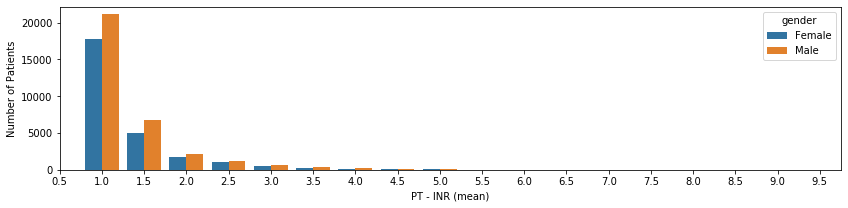

In [254]:
plt.figure(figsize=(14, 3))
sns.barplot(x='mean_ptinr',y='patientunitstayid',hue='gender',data=pts, estimator=np.count_nonzero)
plt.xlim([0, 18.5])
plt.xlabel('PT - INR (mean)')
plt.ylabel('Number of Patients')
#plt.savefig('figures/1C-ptinr-dist.png', dpi=300, transparent=True, bbox_inches='tight')

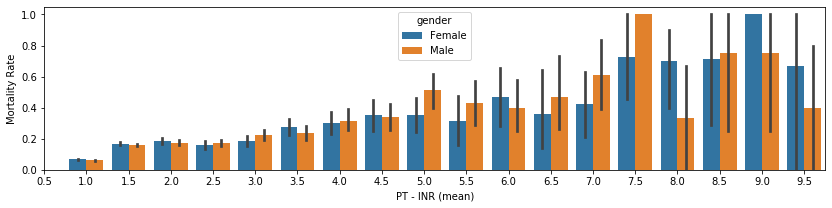

In [255]:
plt.figure(figsize=(14, 3))
sns.barplot(x='mean_ptinr',y='deceased',hue='gender',data=pts)
plt.xlim([0, 18.5])
plt.xlabel('PT - INR (mean)')
plt.ylabel('Mortality Rate')
#plt.savefig('figures/1B-ptinr-mortality.png', dpi=300, transparent=True, bbox_inches='tight')

In [204]:
pts['cond'] = (pts.iloc[:, 32:36] == 1).idxmax(1)

In [208]:
pts_none = pts[pts.cond != 'none']

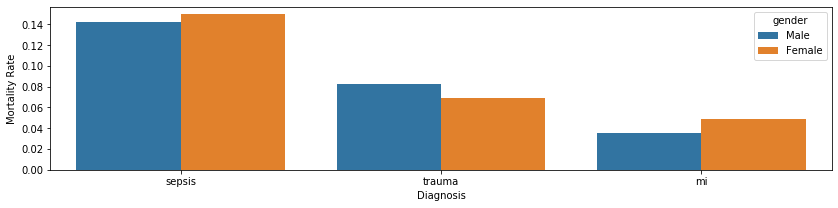

In [256]:
plt.figure(figsize=(14, 3))
sns.barplot(x='cond',y='deceased',hue='gender',data=pts_none, estimator = np.mean, ci=None)
plt.xlabel('Diagnosis')
plt.ylabel('Mortality Rate')
#plt.savefig('figures/1A-trauma-sepsis-mi.png', dpi=300, transparent=True, bbox_inches='tight')

___
#### Trauma Analysis

In [285]:
pts = pd.read_csv('eicu-collaborative-research-database-2.0/patient.csv.gz')
dxs = pd.read_csv('eicu-collaborative-research-database-2.0/diagnosis.csv.gz')
tm = pd.read_csv('eicu-collaborative-research-database-2.0/treatment.csv.gz')
hos = pd.read_csv('eicu-collaborative-research-database-2.0/hospital.csv.gz')
cpg = pd.read_csv('eicu-collaborative-research-database-2.0/carePlanGeneral.csv.gz')
lab = pd.read_csv('eicu-collaborative-research-database-2.0/lab.csv.gz')

In [287]:
pts = pts[pts.gender != 'Unknown']
pts = pts[pts.gender != 'Other']
pts = pts[pts.unitadmitsource == 'Emergency Department']
pts = pd.merge(pts, hos, on=['hospitalid'], how = 'left')

In [288]:
def age (x):
    if x == '> 89':
        return 90
    else:
        return int(x)

In [289]:
pts['hospitaladmitsource'].fillna(value = 'Unknown', inplace = True)

pts['age'].fillna(value = 0, inplace = True)
pts['age'] = pts['age'].apply(lambda x: age(x))

In [290]:
pts = pts[pts['apacheadmissiondx'].str.contains('trauma', case = False).fillna(False)]

In [291]:
# adding icd9 codes
dxs = dxs.drop(columns=['diagnosisid', 'activeupondischarge', 'diagnosisoffset', 'diagnosisstring'])
dxs.dropna(inplace=True)

# merge
dxs = dxs.groupby('patientunitstayid')['icd9code'].apply(list).reset_index(name='icd9codes')
pts = pd.merge(pts, dxs, on=['patientunitstayid'], how='left')

In [292]:
pts = pts.drop(columns=['hospitaladmittime24', 'hospitaldischargeyear', 'hospitaldischargetime24',
                       'unitadmittime24', 'dischargeweight', 'unitdischargetime24', 'patienthealthsystemstayid'])

In [293]:
pts.head()

,patientunitstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmitoffset,hospitaladmitsource,hospitaldischargeoffset,hospitaldischargelocation,hospitaldischargestatus,unittype,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid,numbedscategory,teachingstatus,region,icd9codes
0,141264,Male,19,Caucasian,59,91,Head only trauma,188.0,-106,Unknown,803,Home,Alive,Med-Surg ICU,Emergency Department,1,admit,NaN,292,Step-Down Unit (SDU),Alive,002-47110,<100,f,Midwest,NaN
1,144519,Male,56,Caucasian,68,103,Head only trauma,180.3,-2,Emergency Department,2656,Home,Alive,SICU,Emergency Department,1,admit,99.80,1293,Floor,Alive,002-33534,<100,f,Midwest,NaN
2,144689,Male,57,Caucasian,73,97,Extremity only trauma,170.2,-1,Emergency Department,40299,Skilled Nursing Facility,Alive,MICU,Emergency Department,1,admit,49.89,4190,Floor,Alive,002-38176,>= 500,t,Midwest,"[728.89, 728.89, 451.2, I80.3, 991.6, 584.9, N..."
3,145604,Male,85,Hispanic,73,100,Head only trauma,152.4,-2,Emergency Department,35034,Skilled Nursing Facility,Alive,Neuro ICU,Emergency Department,1,admit,63.50,2273,Floor,Alive,002-46870,>= 500,t,Midwest,"[294.9, F03, 432.9, I62.9, 432.9, I62.9, 432.9..."
4,145997,Female,90,Caucasian,73,102,Head only trauma,157.5,-39,Emergency Department,9678,Rehabilitation,Alive,Neuro ICU,Emergency Department,1,admit,NaN,1572,Floor,Alive,002-5575,>= 500,t,Midwest,"[852.20, S06.5, 135, 517.8, D86.9, 401.9, I10]"


In [294]:
pts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5017 entries, 0 to 5016
Data columns (total 26 columns):
patientunitstayid            5017 non-null int64
gender                       5016 non-null object
age                          5017 non-null int64
ethnicity                    4957 non-null object
hospitalid                   5017 non-null int64
wardid                       5017 non-null int64
apacheadmissiondx            5017 non-null object
admissionheight              4885 non-null float64
hospitaladmitoffset          5017 non-null int64
hospitaladmitsource          5017 non-null object
hospitaldischargeoffset      5017 non-null int64
hospitaldischargelocation    4950 non-null object
hospitaldischargestatus      4955 non-null object
unittype                     5017 non-null object
unitadmitsource              5017 non-null object
unitvisitnumber              5017 non-null int64
unitstaytype                 5017 non-null object
admissionweight              4878 non-null float6

In [313]:
lab.head(10)

,patientunitstayid,labname,labresult,labmeasurenamesystem,labmeasurenameinterface
0,141168,fibrinogen,177.00,mg/dL,mg/dL
1,141168,PT - INR,2.50,ratio,NaN
2,141168,magnesium,2.00,mg/dL,mg/dL
3,141168,PT,26.60,sec,sec
4,141168,pH,7.20,NaN,Units
5,141168,PT - INR,1.70,ratio,NaN
6,141168,urinary creatinine,173.12,mg/dL,mg/dL
7,141168,MCH,29.20,pg,pg
8,141168,BUN,26.00,mg/dL,mg/dL
9,141168,urinary sodium,12.00,mmol/L,mmol/L


In [308]:
lab.drop(columns=['labresultoffset', 'labtypeid', 'labresulttext', 'labresultrevisedoffset', 'labid'], inplace = True)

In [321]:
def lab_val (x, arr):
    try:
        return round(arr['labresult'][x], 1)
    except:
        return 0

In [ ]:
labs = ['PT - INR', 'lactate', 'platelets x 1000', 'WBC x 1000', 'Hgb', 'potassium', 'Hct', 'sodium']

for i in labs:
    lab_df = lab[lab.labname == i].groupby('patientunitstayid').mean()
    pts[i] = pts['patientunitstayid'].apply(lambda x: lab_val(x, lab_df))